# **Data Visualisation Notebook**

## Objectives

* Fulfill Business Requirement 1 - differentiate between healthy cherry leaves and those with powdery mildew. 

## Inputs

* inputs/cherry_leaves_dataset/cherry_leaves/train
* inputs/cherry_leaves_dataset/cherry_leaves/validation
* inputs/cherry_leaves_dataset/cherry_leaves/test

## Outputs

* Scatterplot of image height and width.
* Image shape embeddings in a pickle file.
* Standard deviation and mean of images per label.
* A plot to show image differences between the two classes.
* Image montage. 


---

# Set Working Directories

In [27]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/cherry-leaves-mildew-detection'

In [28]:
os.chdir("/workspace/cherry-leaves-mildew-detection")
print("You set a new current directory.")

You set a new current directory.


In [29]:
current_dir = os.getcwd()
current_dir

'/workspace/cherry-leaves-mildew-detection'

### Set Input Directories

In [30]:
data_dir = "inputs/cherry_leaves_dataset/cherry_leaves"
train_dir = data_dir + "/train"
val_dir = data_dir + "/validation"
test_dir = data_dir + "/test"

### Set Output Directory

In [31]:
version = "v1"
file_path = f"outputs/{version}"
if "outputs" in os.listdir(current_dir) and version in os.listdir(current_dir + "/outputs"):
    print("This directory exists, create a new version.")
else:
    os.makedirs(name=file_path)

This directory exists, create a new version.


### Set Label Names

In [32]:
labels = os.listdir(train_dir)
print("The image labels are", labels)

The image labels are ['healthy', 'powdery_mildew']


---

# Image Shape

### Plot Height and Width

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

def plot_height_width():
    """
    Function to plot height and width in a scatterplot and
    return the mean height and mean width.
    """

    image_height, image_width = [], []
    for label in labels:
        for file in os.listdir(train_dir + "/" + label):
            image = imread(train_dir + "/" + label + "/" + file)
            height, width, color = image.shape
            image_height.append(height)
            image_width.append(width)
    
    sns.distplot(x=image_width)
    plt.title("Image Width Distribution")
    if "image_width_dist.jpg" not in file_path:
        plt.savefig(f"{file_path}/image_width_dist.jpg")
        plt.show()
    else:
        plt.show()

    sns.distplot(x=image_height)
    plt.title("Image Height Distribution")
    if "image_height_dist.jpg" not in file_path:
        plt.savefig(f"{file_path}/image_height_dist.jpg")
        plt.show()
    else:
        plt.show()

    sns.set_theme(style="darkgrid", palette="bright")
    fig, axes = plt.subplots()
    sns.scatterplot(x=image_width, y=image_height, alpha=0.5)
    axes.set_xlabel("Width (pixels)")
    axes.set_ylabel("Height (pixels)")
    axes.set_title("Height and Width of Cherry Leaves Images")

    # To calculate the mean height and width
    height_mean = int(np.array(image_height).mean())
    width_mean = int(np.array(image_width).mean())

    # Save image if it is not in directory
    if "height_width_plot.jpg" not in file_path:
        plt.savefig(f"{file_path}/height_width_plot.jpg")
    else:
        plt.show()
    print(f"The average image height is {height_mean} and the average image width is {width_mean}.")

    return height_mean, width_mean

/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


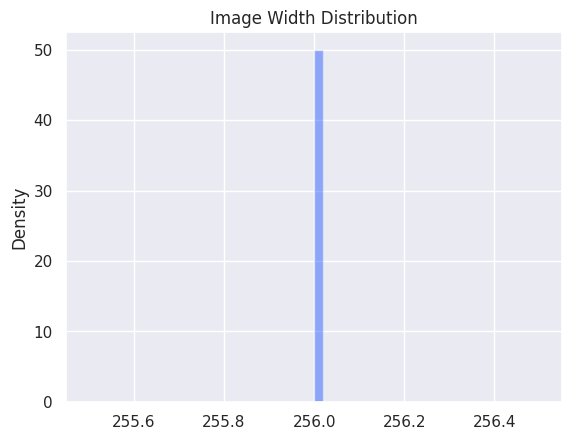

/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/workspace/.pip-modules/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


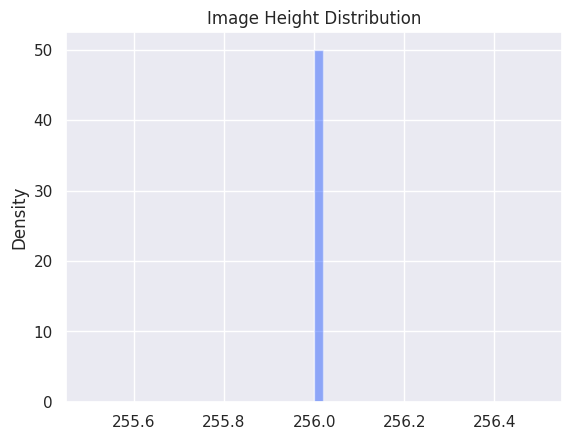

The average image height is 256 and the average image width is 256.


(256, 256, 3)

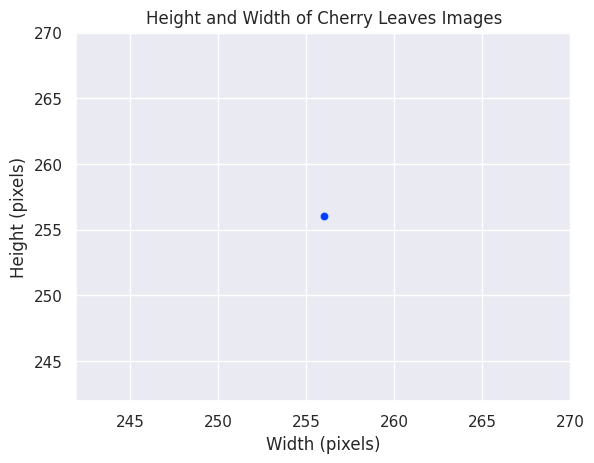

In [44]:
height_mean, height_width = plot_height_width()
image_shape = (height_mean, height_width, 3)
image_shape


Every image in the dataset is of the same exact height and width. 

### Save Image Shape

In [ ]:
if "image_shape_embed.pkl" not in file_path:
    joblib.dump(value=image_shape, filename=f"{file_path}/image_shape_embed.pkl")

---

# Data Visualisation

### Load Images as Array

In [ ]:
from tensorflow.keras.preprocessing import image

def load_images_in_array(data_dir, new_size=(50,50), n_images_per_label=20):
    """
    Function to load images in array.
    """
    # Set X as an interger and y as an object
    X, y = np.array([], dtype="int"), np.array([], dtype="object")
    labels = os.listdir(data_dir)

    for label in labels:
        count = 0
        for image_file in os.listdir(data_dir + "/" + label):
            # Stop when count reaches this number to save time
            if count < n_images_per_label:
                file = image.load_img(data_dir + "/" + label + "/" + image_file, color_mode="rgb", target_size=new_size)
                # Resize the image only if the max pixel value is above 1
                if image.img_to_array(file).max() > 1:
                    resized_image = image.img_to_array(file) / 255
                else:
                    resized_image = image.img_to_array(file)
                X = np.append(X, resized_image).reshape(-1, new_size[0], new_size[1], resized_image.shape[2])
                y = np.append(y, label)
                count += 1

    return X, y

In [ ]:
X, y = load_images_in_array(data_dir=train_dir, new_size=image_shape, n_images_per_label=30)
print(X.shape, y.shape)

### Average Image and Image Variability

In [ ]:
def plot_image_mean_and_variability_as_array(X, y, figsize=(10,5)):
    """
    Function to loop through the labels, subset an array for each label
    and caclulate/plot the standard deviation and mean.
    """
    sns.set_style("white")
    for label in np.unique(y):
        # Subset an array
        y = y.reshape(-1,1,1)
        boolean_mask = np.any(y==label, axis=1).reshape(-1)
        array = X[boolean_mask]

        # Calculate the mean per label
        mean_image = np.mean(array, axis=0)
        # Calculate the variability per label
        std_image = np.std(array, axis=0)

        print(f"Label: {label}")
        print(f"Image shape: {mean_image.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average Image for {label}")
        axes[0].imshow(mean_image, cmap="gray")
        axes[1].set_title(f"Image Variability for {label}")
        axes[1].imshow(std_image, cmap="gray")
        if f"mean_std_{label}.jpg" not in {file_path}:
            plt.savefig(f"{file_path}/mean_std_{label}.jpg")
        else:
            plt.show()
            
        print("\n")

In [ ]:
plot_image_mean_and_variability_as_array(X=X, y=y)

### Differences between Healthy and Powdery Mildew Images

In [ ]:
def subset_image_for_label(X, y, label):
    """
    Function to subset the image per label
    """
    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label, axis=1).reshape(-1)
    df_cherry_leaves = X[boolean_mask]
    return df_cherry_leaves

def differences_between_two_labels(X, y, label_1, label_2, figsize=(15,10)):
    """
    Function to plot the average image and image differences between two labels.
    """
    sns.set_style("white")
    label_list = np.unique(y)

    if label_1 not in label_list:
        print(f"{label_1} is not in {label_list}.")
        return
    elif label_2 not in label_list:
        print(f"{label_2} is not in {label_list}.")
    
    image_1 = subset_image_for_label(X=X, y=y, label=label_1)
    image_1_mean = np.mean(image_1, axis=0)

    image_2 = subset_image_for_label(X=X, y=y, label=label_2)
    image_2_mean = np.mean(image_2, axis=0)

    differences = image_1_mean - image_2_mean

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    print("\n")
    axes[0].set_title(f"Average {label_1}")
    axes[0].imshow(image_1_mean, cmap="gray")
    axes[1].set_title(f"Average {label_2}")
    axes[1].imshow(image_2_mean, cmap="gray")
    axes[2].set_title(f"Differences: Average {label_1} and {label_2}")
    axes[2].imshow(differences, cmap="gray")
    if f"differences_{label_1}_{label_2}.jpg" not in {file_path}:
        plt.savefig(f"{file_path}/differences_{label_1}_{label_2}.jpg")
    else:
        plt.show()


In [ ]:
differences_between_two_labels(X=X, y=y, label_1="healthy", label_2="powdery_mildew")

### Image Montage

In [ ]:
import random
import itertools

def image_montage_data(dir_path, label, nrows, ncols, figsize=(15, 10)):
    """
    Function to subset label of interest, check if label is in the folder,
    check if grid space is greater than the subset size and display the images. 
    """
    sns.set_style("white")
    labels = os.listdir(dir_path)
    if label in labels:
        image_list = os.listdir(dir_path + "/" + label)
        if nrows * ncols < len(image_list):
            image_index = random.sample(image_list, nrows * ncols)
        else: 
            print(f"The montage space {nrows * ncols} is greater than the subset.")
            print(f"Reduce the nrows and ncols.")
            return
        
        list_of_rows = range(0, nrows)
        list_of_cols = range(0, ncols)
        ax_indices = list(itertools.product(list_of_rows, list_of_cols))

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for i in range(0, nrows * ncols):
            file = imread(dir_path + "/" + label + "/" + image_index[i], 0)
            img_shape = file.shape
            axes[ax_indices[i][0], ax_indices[i][1]].set_title(f"Height: {img_shape[0]}px Width: {img_shape[1]}px")
            axes[ax_indices[i][0], ax_indices[i][1]].imshow(file)
            # Set the tick locations of x axis
            axes[ax_indices[i][0], ax_indices[i][1]].set_xticks([])
            # Set the tick locations of y axis
            axes[ax_indices[i][0], ax_indices[i][1]].set_yticks([])
        plt.tight_layout()
        plt.show()
    else:
        print(f"Choose from the labels: {labels}")

In [ ]:
for label in labels:
    print(label)
    image_montage_data(dir_path=train_dir, label=label, nrows=3, ncols=3, figsize=(15,10))
    print("\n")

---

# Conclusions

Image data from the test set was resized with the average image and image variability determined. The differences between images from two labels were also plotted. An image montage was created.

---

# Next Steps

The training dataset will be used to create a pipeline and fit a model. The model will be tuned using the validation set and finally the test will be used to test the model with unseen data.

---